🌼Destyasti Sri Puspito Widi - 24/554312/NPA/19974🌼

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path='/content/drive/MyDrive/PengenalanPola_desty/dataset-master/JPEGImages'

In [4]:
# List file gambar
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(f"Jumlah gambar ditemukan: {len(image_files)}")
print("Contoh nama file:", image_files[:5])  # Menampilkan 5 nama file pertama

Jumlah gambar ditemukan: 366
Contoh nama file: ['BloodImage_00275.jpg', 'BloodImage_00315.jpg', 'BloodImage_00301.jpg', 'BloodImage_00103.jpg', 'BloodImage_00077.jpg']


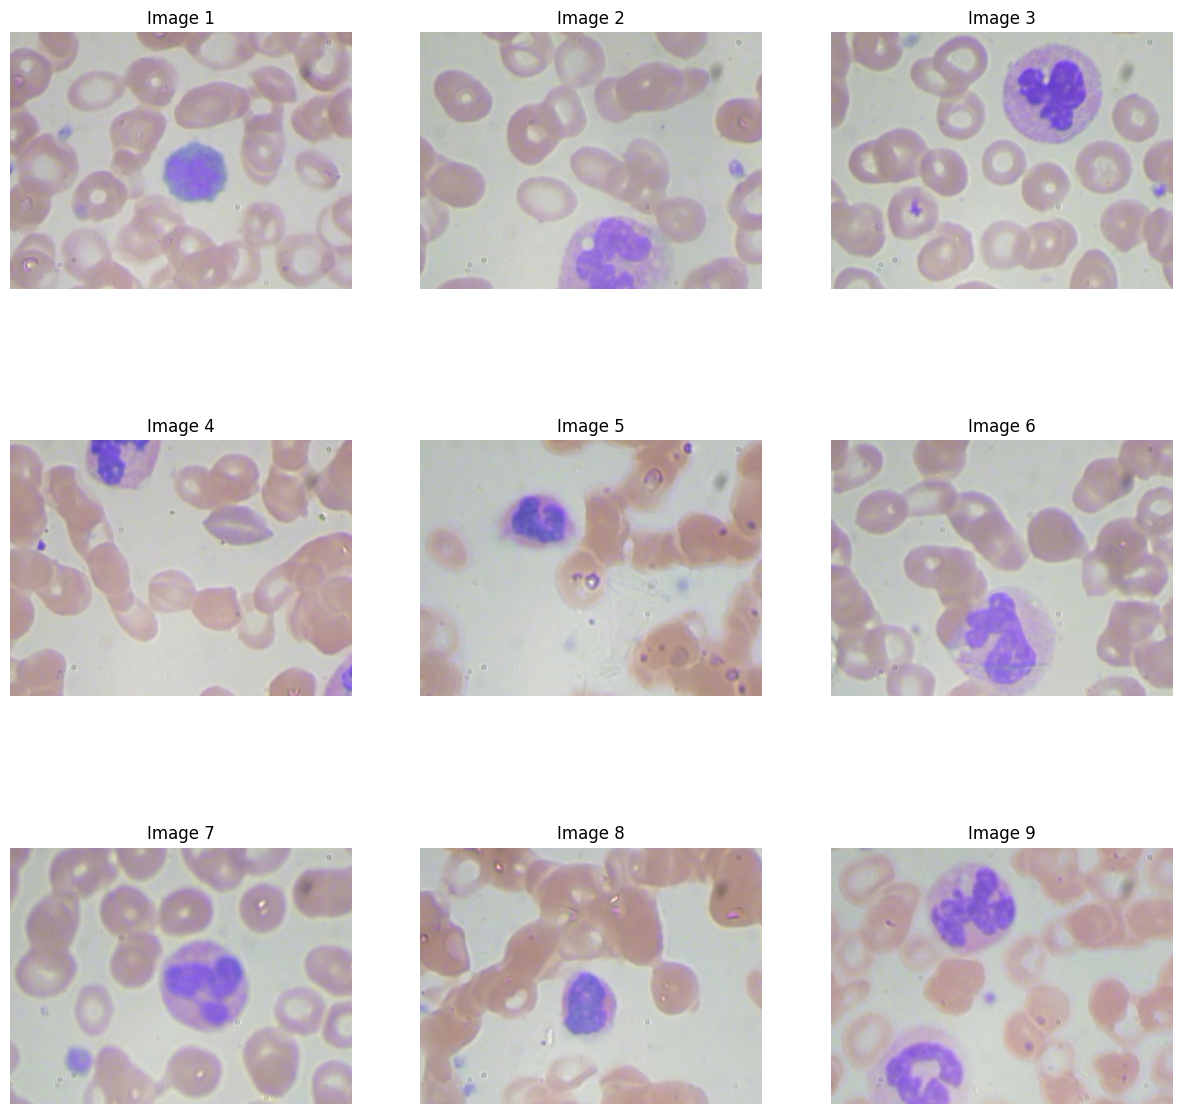

In [5]:
# Baca dan menampilkan 9 contoh gambar dalam grid 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Grid 3x3

for i, img_name in enumerate(image_files[:9]):
    img = cv2.imread(os.path.join(dataset_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR ke RGB

    row, col = divmod(i, 3)  # Hitung posisi baris dan kolom
    axes[row, col].imshow(img)
    axes[row, col].axis("off")
    axes[row, col].set_title(f"Image {i+1}")

plt.show()

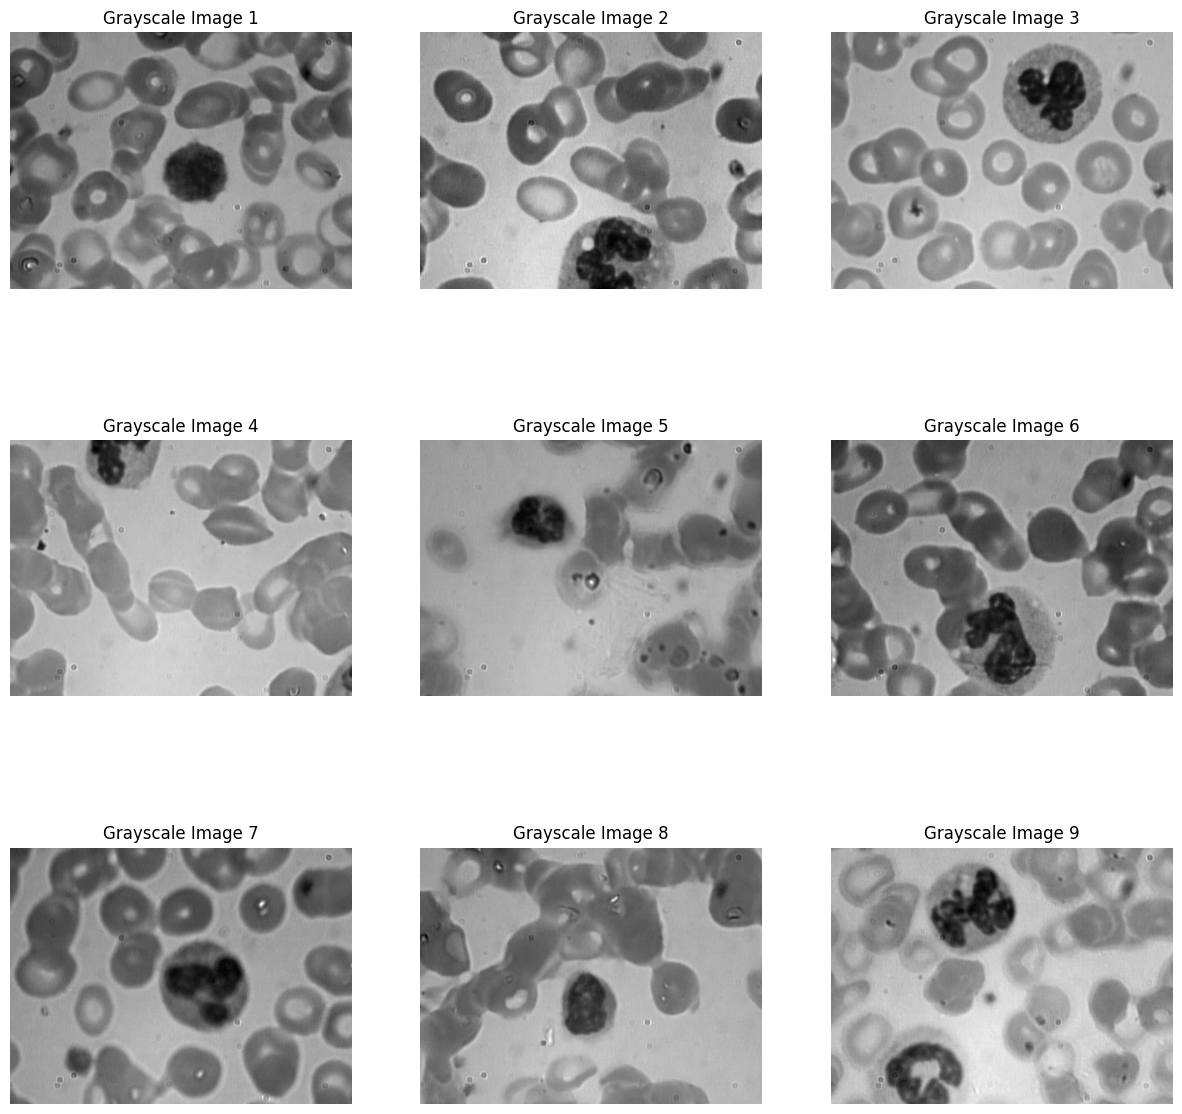

In [6]:
# Baca dan konversi ke grayscale (9 gambar)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Buat grid 3x3

for i, img_name in enumerate(image_files[:9]):  # Ambil 9 gambar pertama
    img = cv2.imread(os.path.join(dataset_path, img_name))
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale

    row, col = divmod(i, 3)  # Hitung posisi di grid
    axes[row, col].imshow(gray_img, cmap='gray')
    axes[row, col].axis("off")
    axes[row, col].set_title(f"Grayscale Image {i+1}")

plt.show()

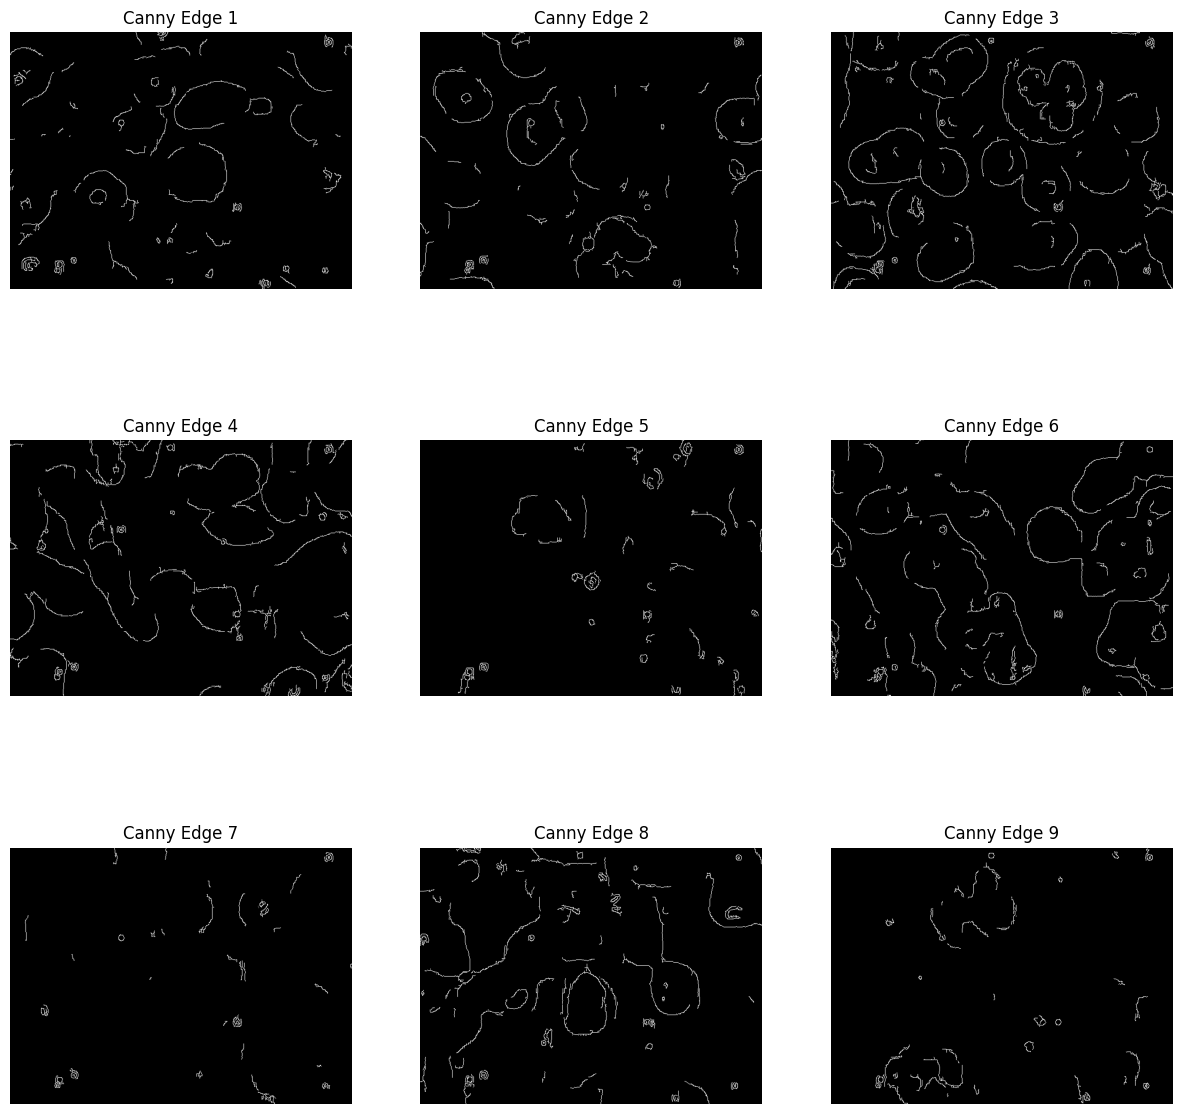

In [7]:
# Deteksi tepi menggunakan Canny dengan threshold
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Grid 3x3

for i, img_name in enumerate(image_files[:9]):
    img = cv2.imread(os.path.join(dataset_path, img_name), cv2.IMREAD_GRAYSCALE)  # Baca grayscale

    # Ubah threshold agar lebih sensitif
    edges = cv2.Canny(img, threshold1=20, threshold2=80)

    row, col = divmod(i, 3)  # Hitung posisi di grid
    axes[row, col].imshow(edges, cmap='gray')
    axes[row, col].axis("off")
    axes[row, col].set_title(f"Canny Edge {i+1}")

plt.show()

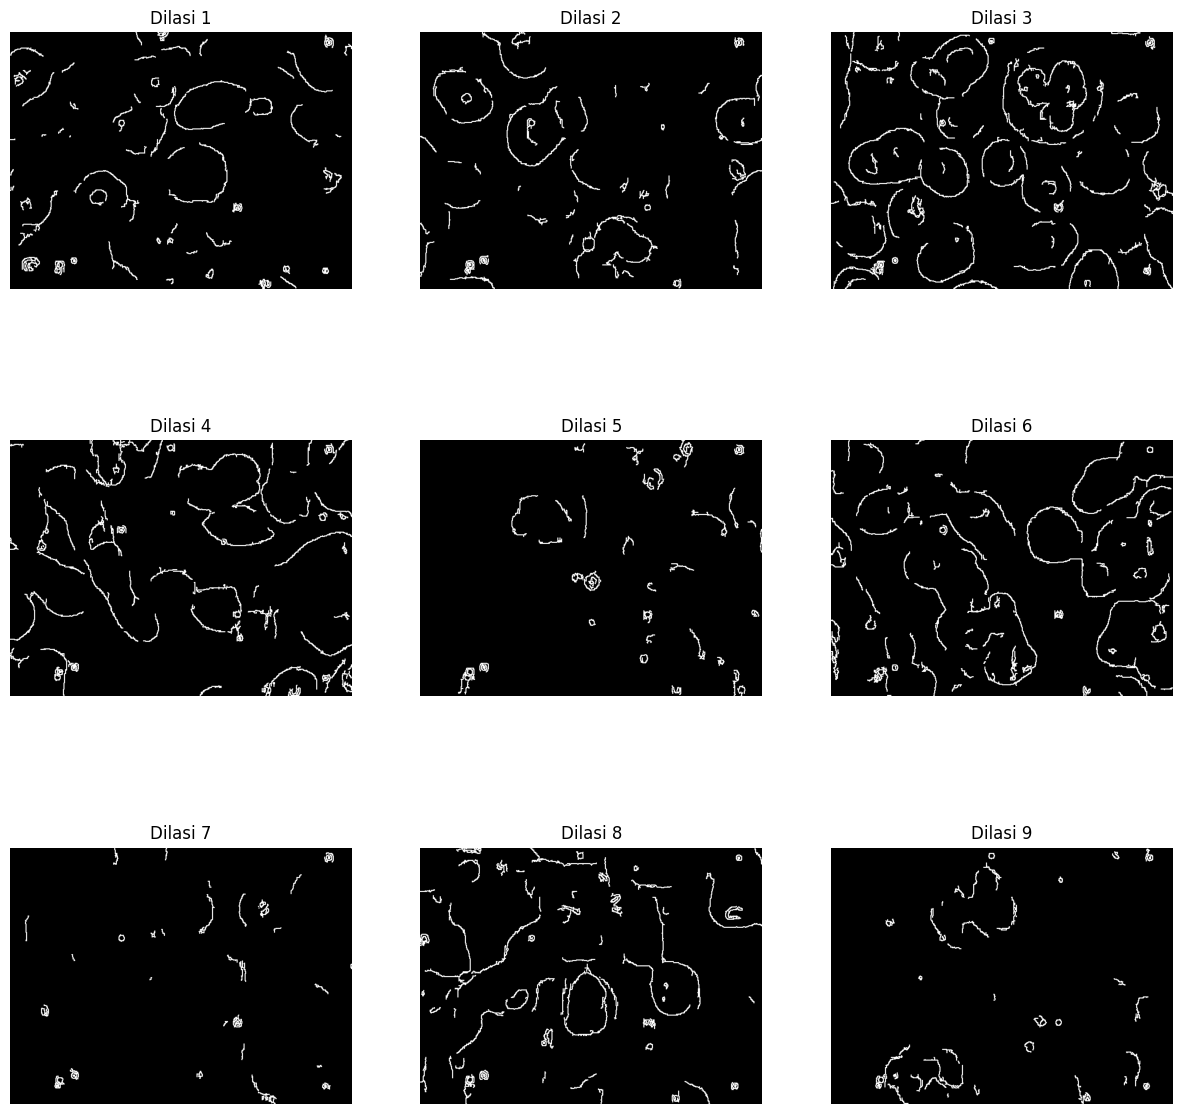

In [8]:
# Dilasi (Strel = 2 piksel)
kernel = np.ones((2,2), np.uint8)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, img_name in enumerate(image_files[:9]):
    img = cv2.imread(os.path.join(dataset_path, img_name), cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, 20, 80)

    dilated = cv2.dilate(edges, kernel, iterations=1)

    row, col = divmod(i, 3)
    axes[row, col].imshow(dilated, cmap='gray')
    axes[row, col].axis("off")
    axes[row, col].set_title(f"Dilasi {i+1}")

plt.show()

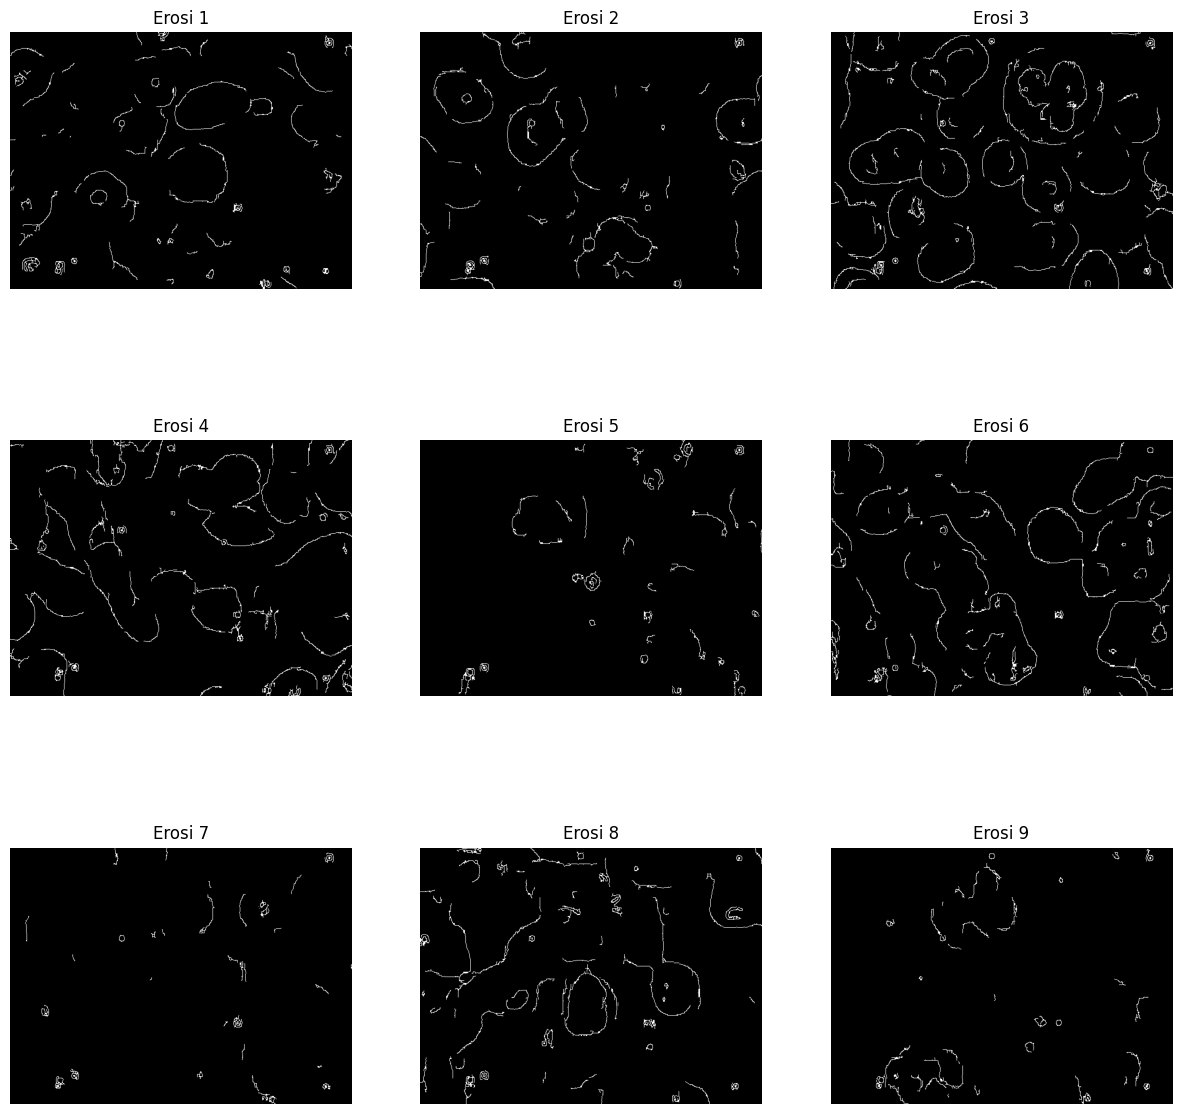

In [9]:
# Erosi (Strel = 2 piksel)
kernel = np.ones((2,2), np.uint8)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, img_name in enumerate(image_files[:9]):
    img = cv2.imread(os.path.join(dataset_path, img_name), cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, 20, 80)
    dilated = cv2.dilate(edges, kernel, iterations=1)

    eroded = cv2.erode(dilated, kernel, iterations=1)

    row, col = divmod(i, 3)
    axes[row, col].imshow(eroded, cmap='gray')
    axes[row, col].axis("off")
    axes[row, col].set_title(f"Erosi {i+1}")

plt.show()

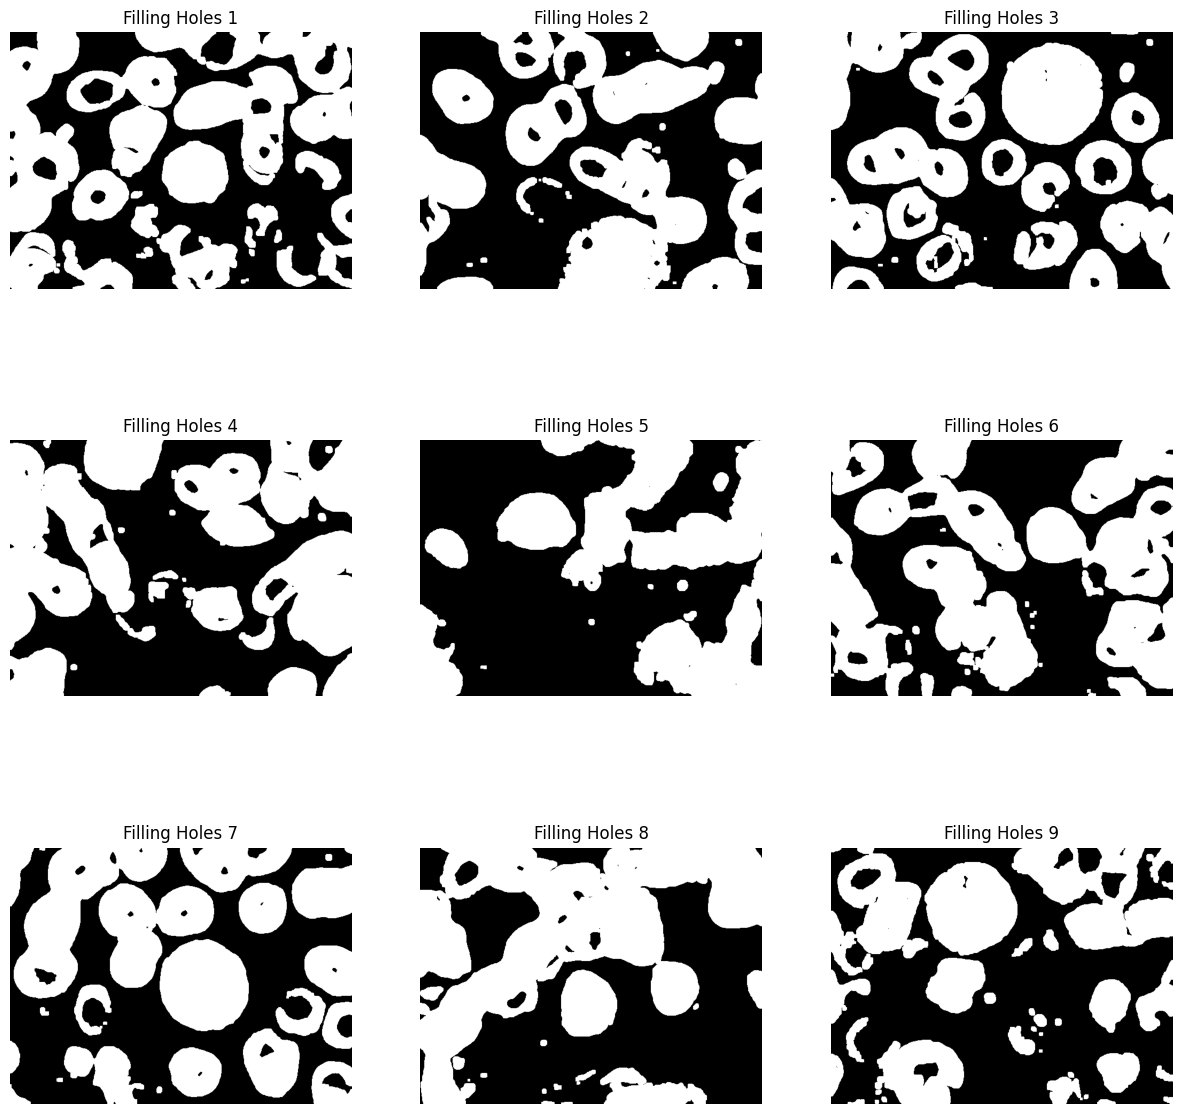

In [10]:
# Refined Closing (Filling Holes)
refined_closing_images = []  # List untuk menyimpan hasil closing

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, img_name in enumerate(image_files[:9]):
    img = cv2.imread(os.path.join(dataset_path, img_name), cv2.IMREAD_GRAYSCALE)

    # Thresholding dengan Otsu
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Gunakan median filter untuk mengurangi noise sebelum closing
    binary = cv2.medianBlur(binary, 5)

    # Morphological Closing untuk menutup lubang
    kernel = np.ones((5,5), np.uint8)
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=1)

    # Dilasi dikurangi biar gak overfill
    closed = cv2.dilate(closed, kernel, iterations=1)

    refined_closing_images.append(closed)  # Simpan hasil closing

    axes[i//3, i%3].imshow(closed, cmap='gray')
    axes[i//3, i%3].axis("off")
    axes[i//3, i%3].set_title(f"Filling Holes {i+1}")

plt.show()

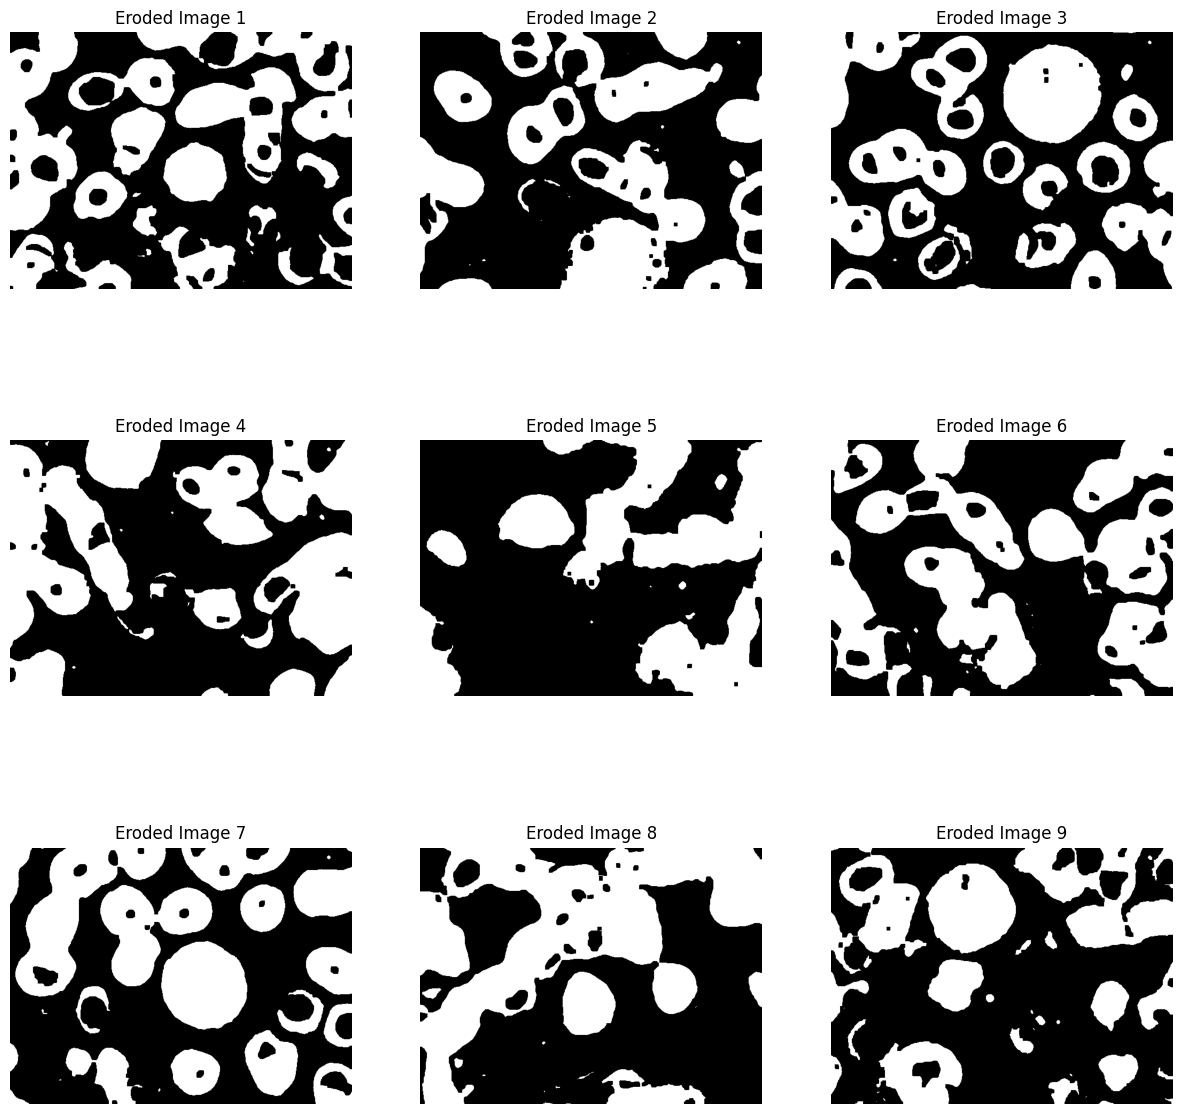

In [11]:
#Erosi (Strel = 7 piksel)
eroded_images = []
kernel_erode = np.ones((7,7), np.uint8)  # Kernel erosi (Strel = 7 piksel)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, img in enumerate(refined_closing_images[:9]):
    eroded = cv2.erode(img, kernel_erode, iterations=1)  # Proses erosi
    eroded_images.append(eroded)

    axes[i//3, i%3].imshow(eroded, cmap='gray')
    axes[i//3, i%3].axis("off")
    axes[i//3, i%3].set_title(f"Eroded Image {i+1}")

plt.show()

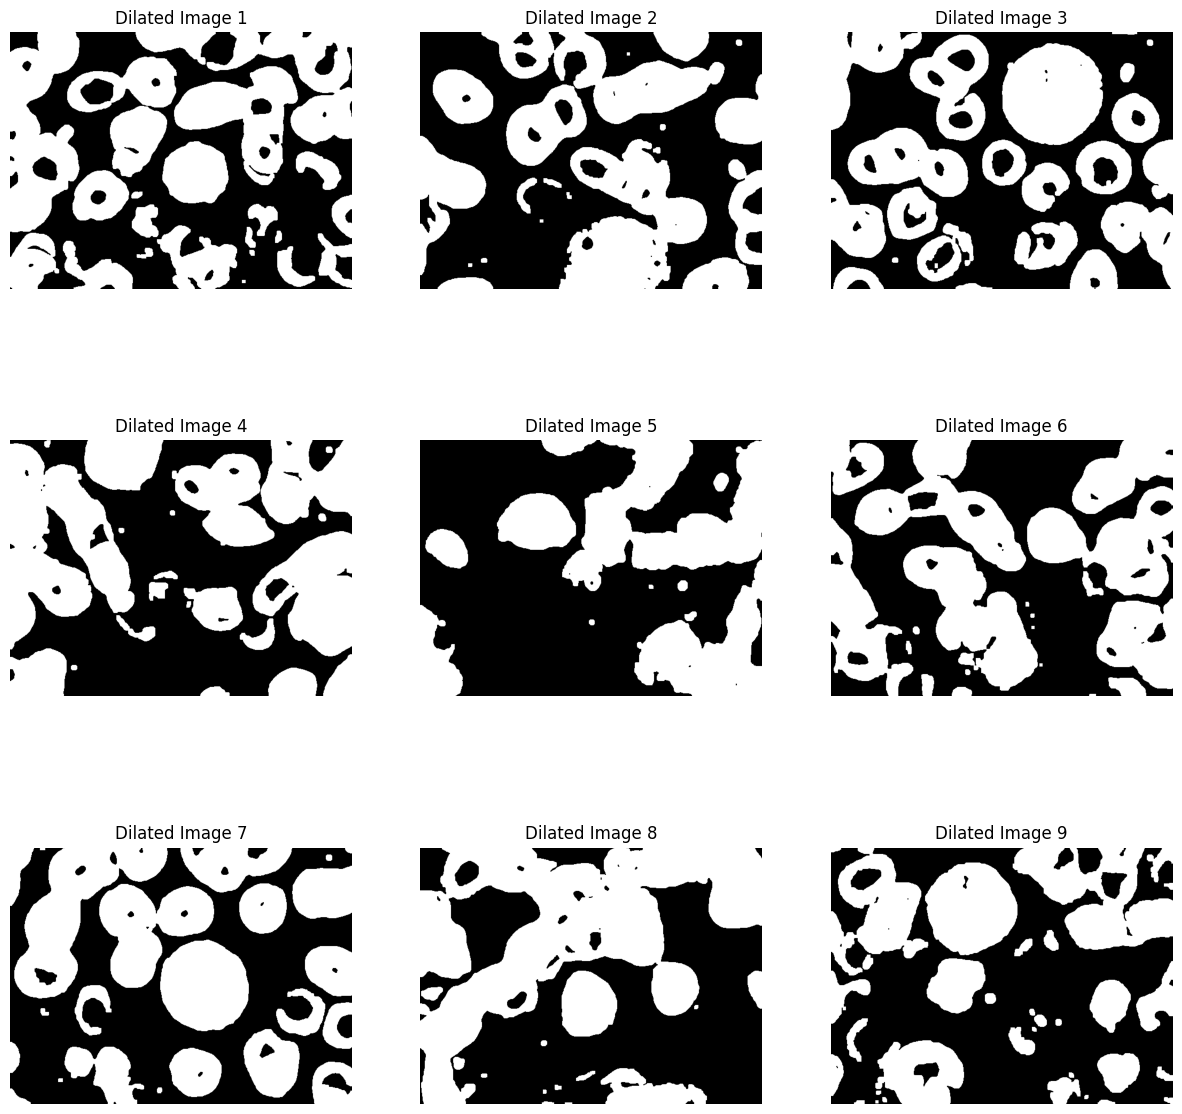

In [12]:
#Dilasi (Strel = 6 piksel)
dilated_images = []
kernel_dilate = np.ones((6,6), np.uint8)  # Kernel dilasi (Strel = 6 piksel)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, img in enumerate(eroded_images[:9]):
    dilated = cv2.dilate(img, kernel_dilate, iterations=1)  # Proses dilasi
    dilated_images.append(dilated)

    axes[i//3, i%3].imshow(dilated, cmap='gray')
    axes[i//3, i%3].axis("off")
    axes[i//3, i%3].set_title(f"Dilated Image {i+1}")

plt.show()

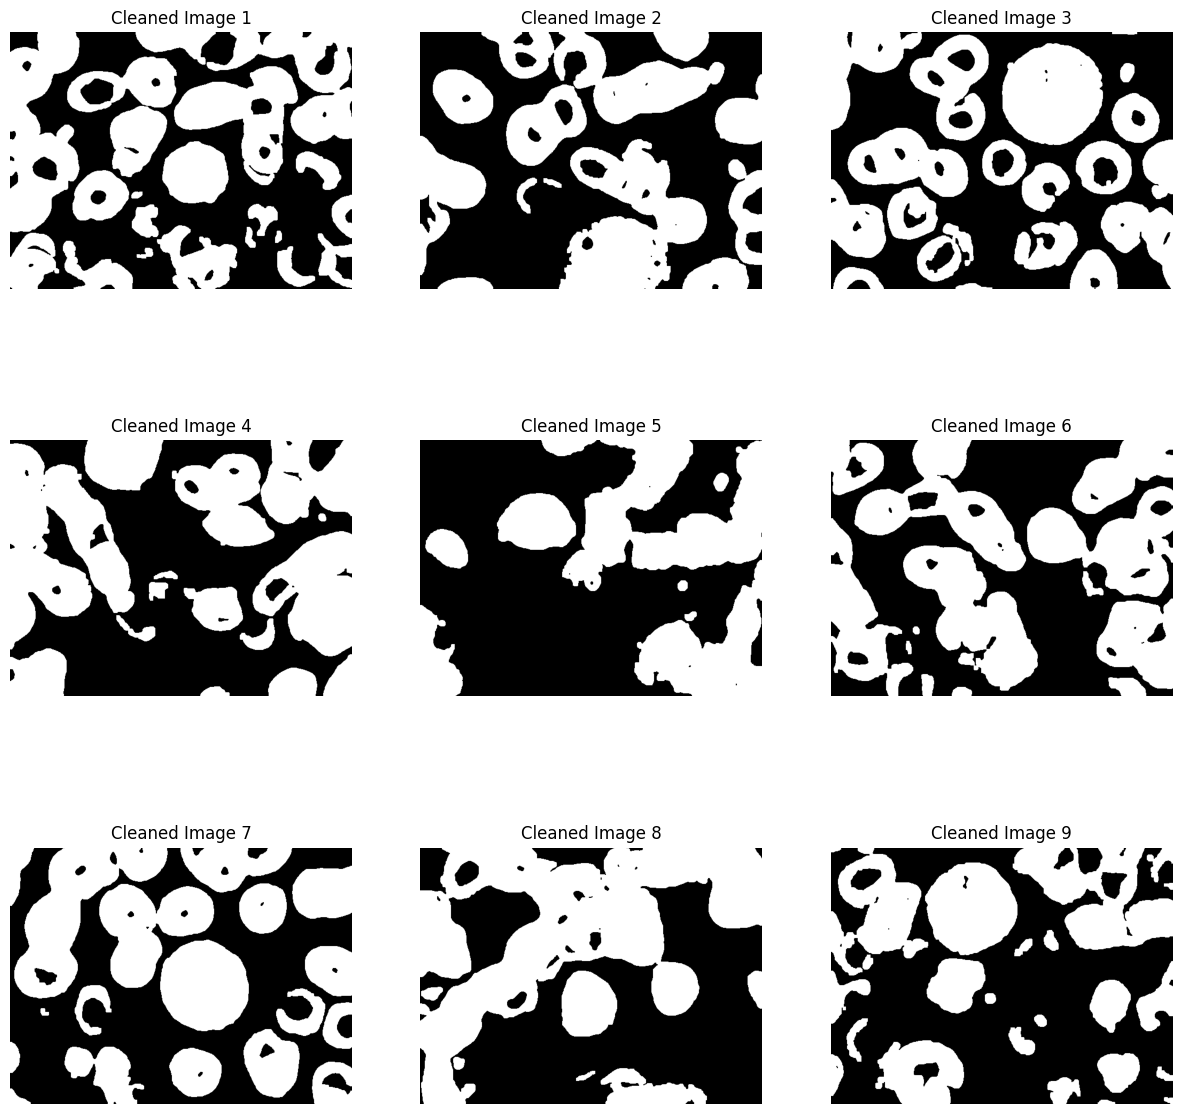

In [13]:
#Hapus objek dengan ukuran < 150 piksel
cleaned_images = []

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, img in enumerate(dilated_images[:9]):
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(img, connectivity=8)

    # Buat mask hanya untuk objek dengan ukuran >= 150 piksel
    cleaned = np.zeros_like(img)
    for j in range(1, num_labels):  # Skip label 0 karena itu background
        if stats[j, cv2.CC_STAT_AREA] >= 150:
            cleaned[labels == j] = 255

    cleaned_images.append(cleaned)

    axes[i//3, i%3].imshow(cleaned, cmap='gray')
    axes[i//3, i%3].axis("off")
    axes[i//3, i%3].set_title(f"Cleaned Image {i+1}")

plt.show()

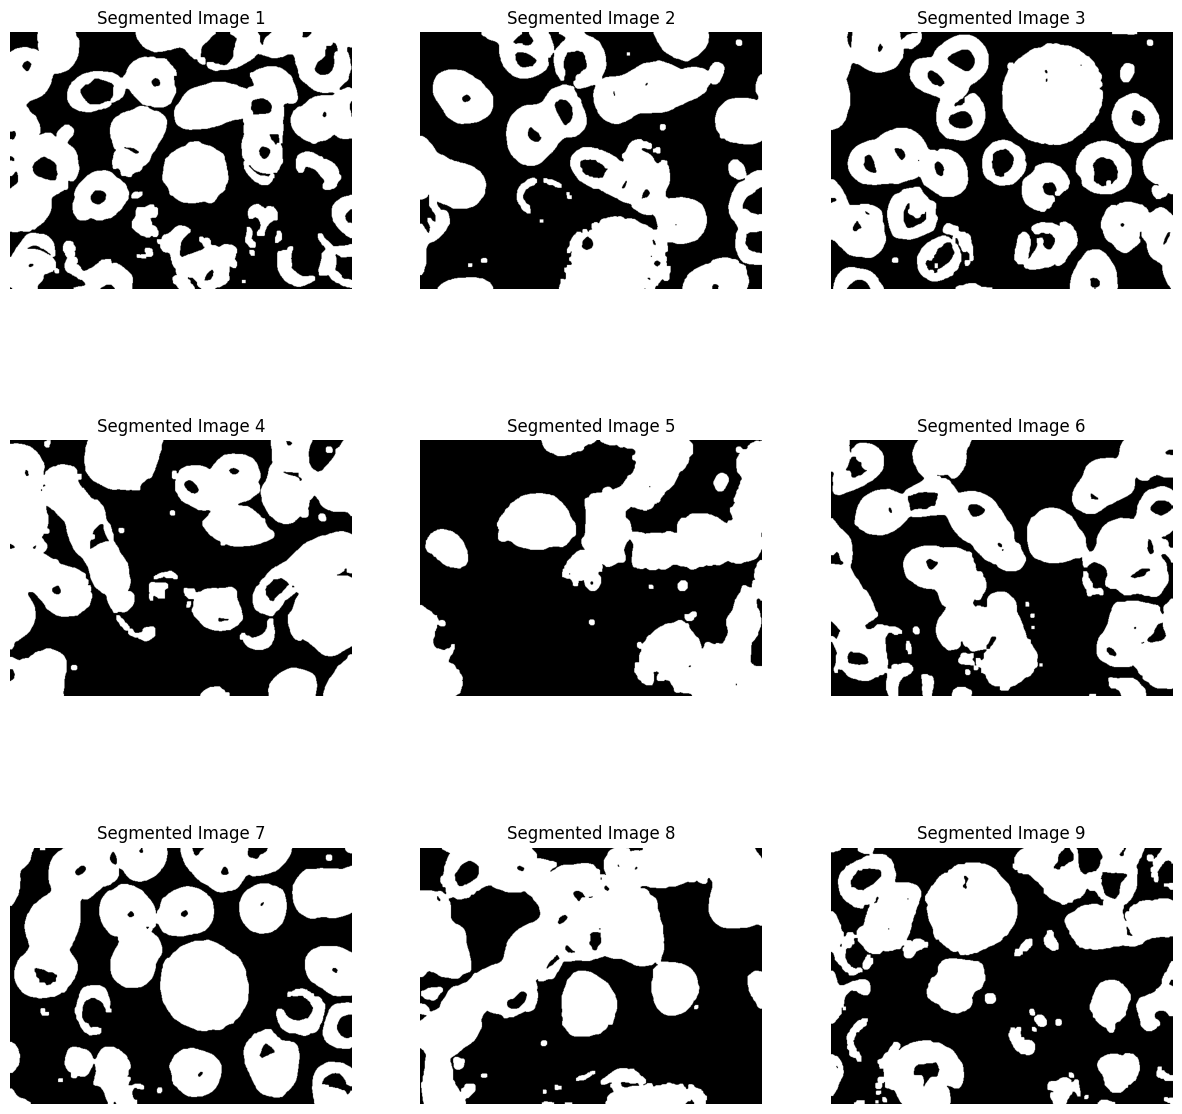

In [14]:
# Menampilkan hasil segmentasi setelah semua proses selesai
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, segmented_img in enumerate(dilated_images[:9]):  # Menggunakan hasil dari tahap sebelumnya
    axes[i//3, i%3].imshow(segmented_img, cmap='gray')
    axes[i//3, i%3].axis("off")
    axes[i//3, i%3].set_title(f"Segmented Image {i+1}")

plt.show()

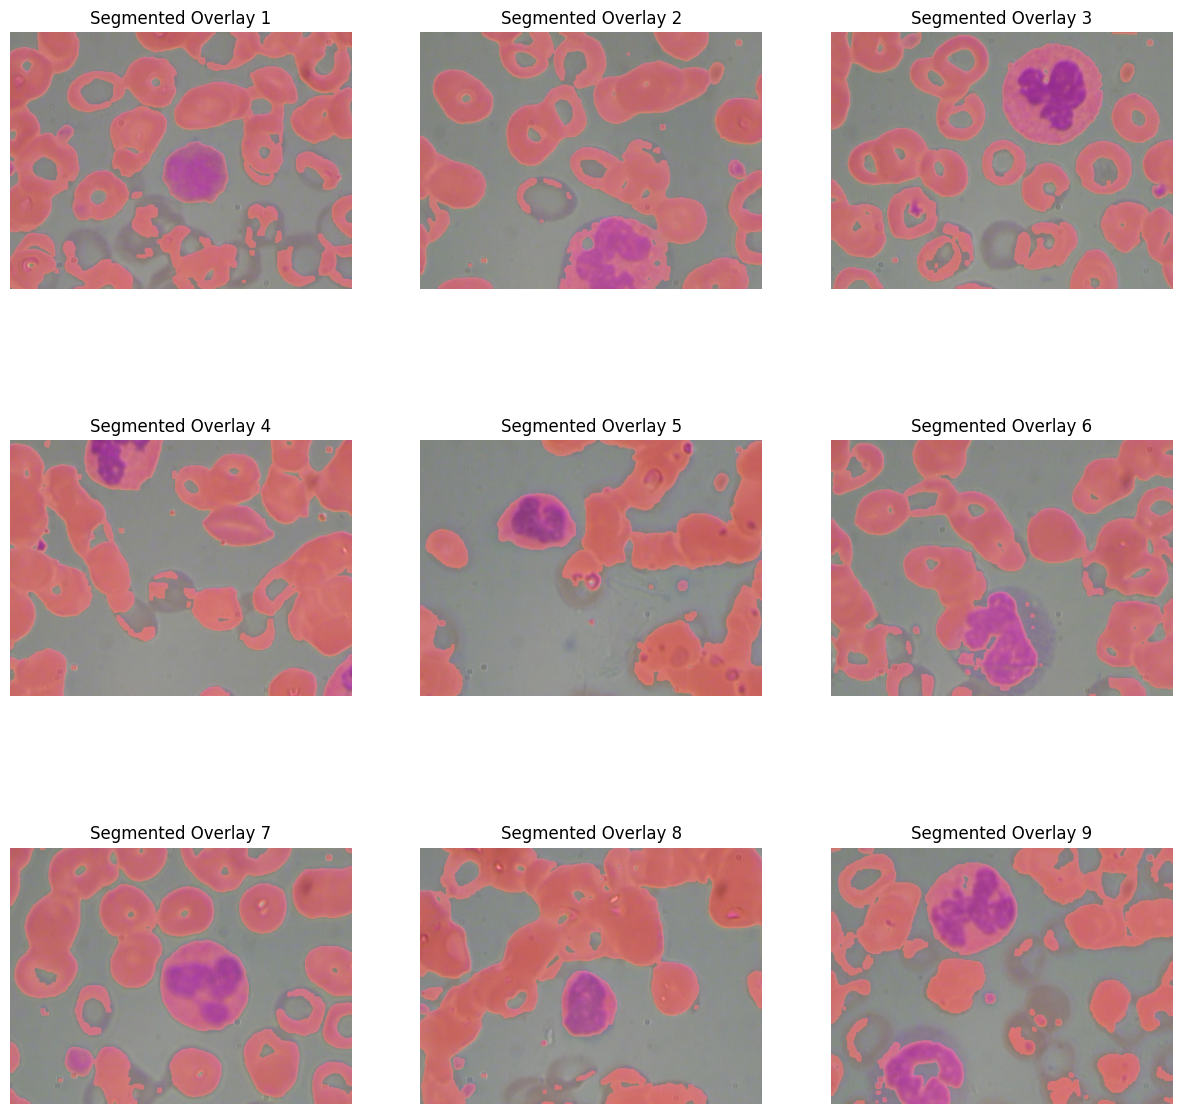

In [16]:
#ini untuk melihat warnanya atau konversi ke RGB
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, (segmented_img, img_name) in enumerate(zip(dilated_images[:9], image_files[:9])):
    # Baca citra asli
    original_img = cv2.imread(os.path.join(dataset_path, img_name))
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Konversi ke RGB

    # Buat mask warna (merah) dari hasil segmentasi
    mask = np.zeros_like(original_img)
    mask[:, :, 0] = segmented_img  # Hanya saluran merah yang berisi segmentasi

    # Overlay gambar asli dengan mask
    overlayed_img = cv2.addWeighted(original_img, 0.7, mask, 0.3, 0)

    # Tampilkan hasil
    axes[i//3, i%3].imshow(overlayed_img)
    axes[i//3, i%3].axis("off")
    axes[i//3, i%3].set_title(f"Segmented Overlay {i+1}")

plt.show()